---

<center><h1> 📍 📍 Assignment 5 📍 📍</h1></center>

---

# **New York City Taxi Trip Duration**

### Project: Building Basic predictive models over the NYC Taxi Trip dataset.
- We have the NYC Taxi Trip Dataset. This dataset contains information about the taxi trips that took place in different parts of New York City and how much time did that trip take to complete.
#### In this project, the following are the tasks we are going to solve-
1. Build a K-Nearest neighbours model for the given dataset and find the best value of K.
2. Build a Linear model for the given dataset with regularisation.
3. Build a Random Forest model for the given dataset.
4. Build a Gradient Boosting model for the given dataset.
5. Combine all the models above using the averaging technique to generate the final predictions.

#### Import Important Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import Series
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

#### Import the data set

In [2]:
df = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')

In [3]:
# train_df = pd.read_csv('/kaggle/input/nyc-taxi-trip-duration/train.zip')
# test_df = pd.read_csv('/kaggle/input/nyc-taxi-trip-duration/test.zip')

**Take a Quick Look at the Data Structure**

In [4]:
df.shape

(729322, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [6]:
# Check duplicate values
df.duplicated().sum()

0

In [7]:
# check null values in dataset
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

> ***Finding:** There are no duplicated or missing values*

In [8]:
# Take a look at dataset
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


# **Visualization**

In [9]:
round(df.describe())

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.0,729322.0,729322.0,729322.0,729322.0,729322.0,729322.0
mean,2.0,2.0,-74.0,41.0,-74.0,41.0,952.0
std,0.0,1.0,0.0,0.0,0.0,0.0,3865.0
min,1.0,0.0,-122.0,35.0,-122.0,32.0,1.0
25%,1.0,1.0,-74.0,41.0,-74.0,41.0,397.0
50%,2.0,1.0,-74.0,41.0,-74.0,41.0,663.0
75%,2.0,2.0,-74.0,41.0,-74.0,41.0,1075.0
max,2.0,9.0,-66.0,52.0,-66.0,44.0,1939736.0


> ***Finding**: We clearly see trip_duration takes strange values for min and max. Let's have a quick visualization with a boxplot.*

**Outlier visualization**

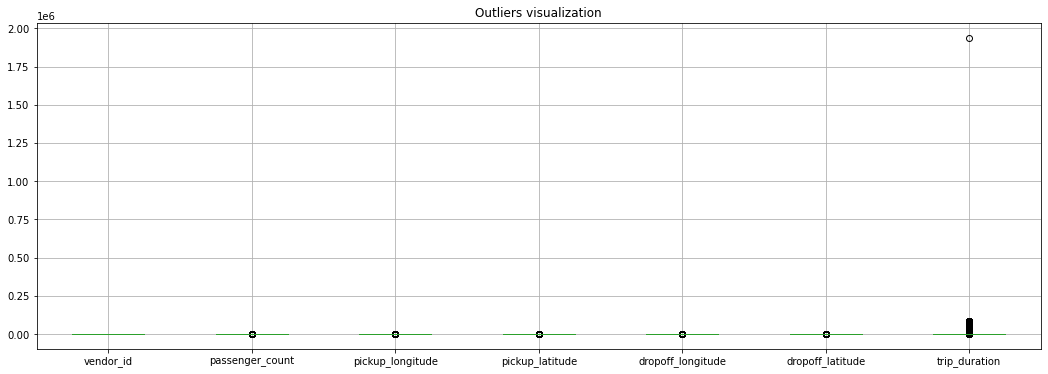

In [10]:
plt.subplots(figsize=(18,6))
plt.title("Outliers visualization")
df.boxplot();

> ***Finding:** We are asked to predict trip_duration of the test set, so I first check what kind of trips durations are present in the dataset. Because of the outliers i decided to go ahead with the log scale.*

**Visualize the trip duration**

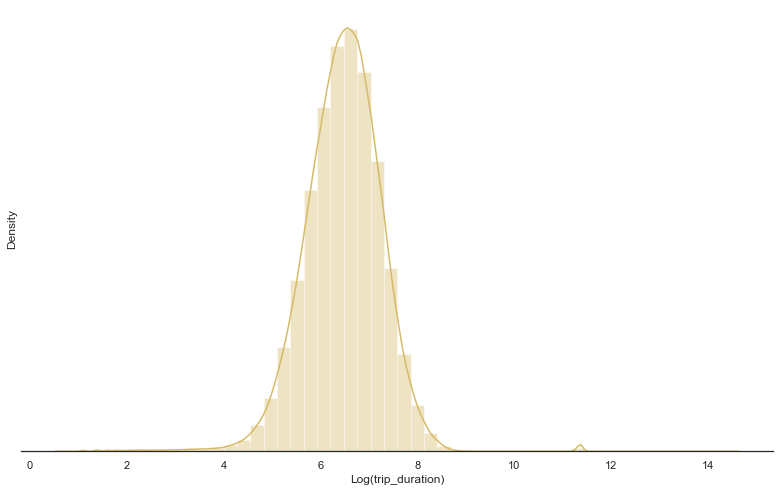

In [11]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(df['trip_duration'].values+1), axlabel = 'Log(trip_duration)', label = 'log(trip_duration)', bins = 50, color="y")
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

> ***Finding**: There are outliers for trip_duration. I think it will probably damage my model, so I choose to get rid of them*

**Visualize pickup and dropoff coordinations**



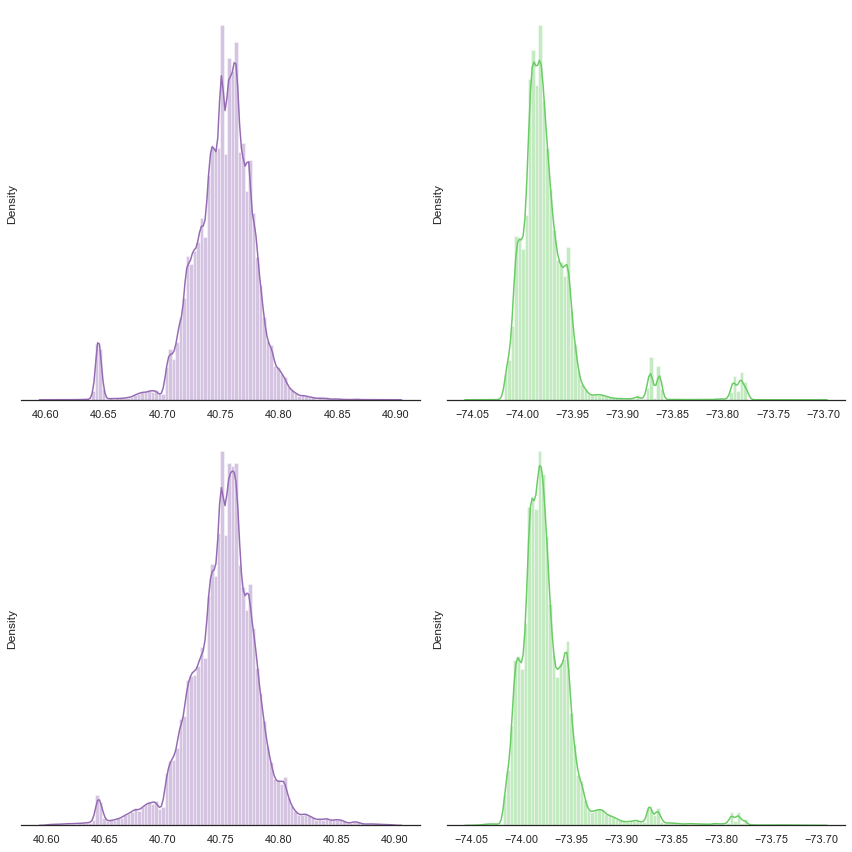

In [12]:
data = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
data = data.loc[(data.dropoff_latitude>40.6) & (data.dropoff_latitude < 40.9)]
data = data.loc[(data.dropoff_longitude > -74.05) & (data.dropoff_longitude < -73.7)]
data = data.loc[(data.pickup_longitude > -74.05) & (data.pickup_longitude < -73.7)]
df_new = data.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(12, 12), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(df_new['pickup_latitude'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(df_new['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins =100, ax=axes[0,1])
sns.distplot(df_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(df_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="g",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

**Findings** - It is clear that pick and drop latitude are centered around 40 to 41, and longitude are situated around -74 to -73.

**Plot pickup positions**

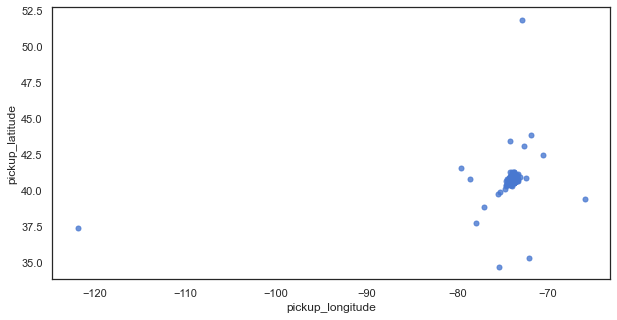

In [13]:
pickup_longitude = list(df.pickup_longitude)
pickup_latitude = list(df.pickup_latitude)
plt.subplots(figsize=(10,5))
plt.plot(pickup_longitude, pickup_latitude, '.', alpha = 0.8, markersize = 10)
plt.xlabel('pickup_longitude')
plt.ylabel('pickup_latitude')
plt.show()

> ***Finding:** I decided to remove those large duration trip by using a cap on coordinations*

**Plot pickup positions**

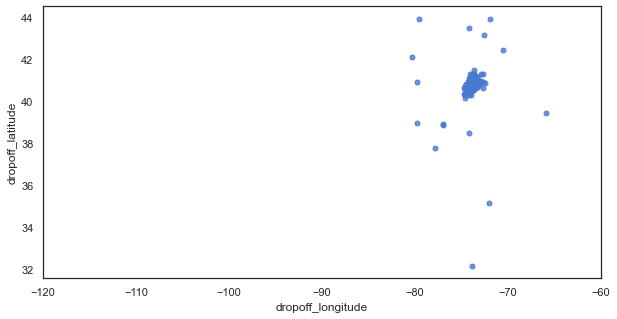

In [14]:
dropoff_longitude = list(df.dropoff_longitude)
dropoff_latitude = list(df.dropoff_latitude)
plt.subplots(figsize=(10,5))
plt.xlim(-120,-60)
plt.plot(dropoff_longitude, dropoff_latitude, '.', alpha = 0.8, markersize = 10)
plt.xlabel('dropoff_longitude')
plt.ylabel('dropoff_latitude')
plt.show()

**Remove pickup point outliers**

In [15]:
df = df[(df.pickup_longitude > -100)]
df = df[(df.pickup_latitude < 50)]

**The average time taken by two different vendors vs weekday**

In [16]:
data = df.copy()
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data.loc[:, 'pick_month'] = data['pickup_datetime'].dt.month
data.loc[:, 'hour'] = data['pickup_datetime'].dt.hour
data.loc[:, 'week_of_year'] = data['pickup_datetime'].dt.weekofyear
data.loc[:, 'day_of_year'] = data['pickup_datetime'].dt.dayofyear
data.loc[:, 'day_of_week'] = data['pickup_datetime'].dt.dayofweek

<AxesSubplot:xlabel='day_of_week'>

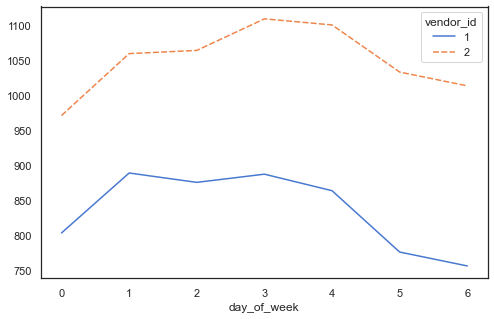

In [17]:
summary_wdays_avg_duration = pd.DataFrame(data.groupby(['vendor_id','day_of_week'])['trip_duration'].mean())
summary_wdays_avg_duration.reset_index(inplace = True)
summary_wdays_avg_duration['unit']=1
summary_wdays_avg_duration_piv = summary_wdays_avg_duration.pivot("day_of_week", "vendor_id", "trip_duration")

plt.figure(figsize=(8,5))
sns.set(style="white", palette="muted", color_codes=True)
sns.lineplot(data=summary_wdays_avg_duration_piv)


> ***Finding**: We have quite explainable pattern between vendor_id and average time so i decided to use vendor_id in my model. Also it's clear that the vendor 1 is taking more time than vendor 2 on all the days of the week*

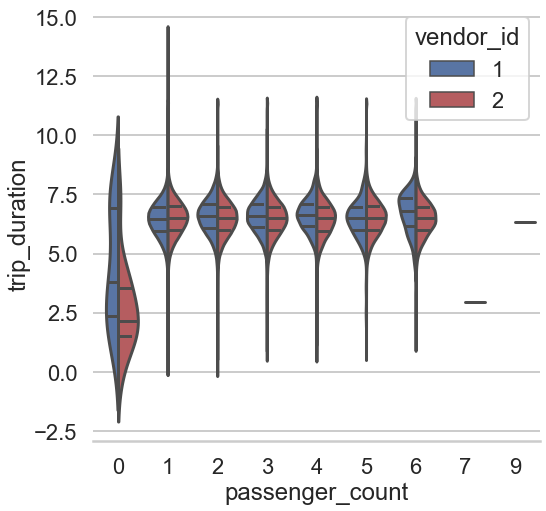

In [18]:
plt.figure(figsize=(8,8))
sns.set(style="whitegrid", color_codes=True)
sns.set_context("poster")
data2 = data.copy()
data2['trip_duration']= np.log(data['trip_duration'])
sns.violinplot(x="passenger_count", y="trip_duration", hue="vendor_id", data=data2, split=True,
               inner="quart",palette={1: "b", 2: "r"})

sns.despine(left=True)


***Findings** -
* There are trips for both the vendor with zeros passengers and few of these trips have negative time as well, so i decided to drop these outliers
* There are very less number of trips with passenger count 7 and 9*



<AxesSubplot:xlabel='hour'>

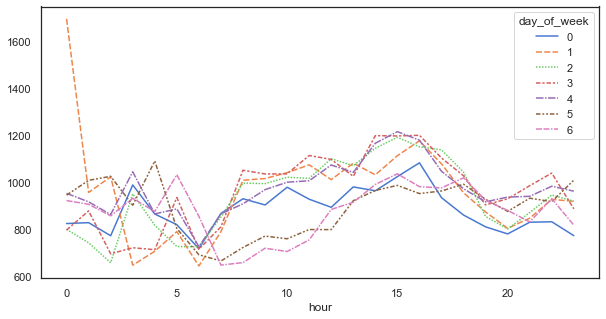

In [19]:
plt.figure(figsize=(10,5))
summary_hour_duration = pd.DataFrame(data.groupby(['day_of_week','hour'])['trip_duration'].mean())
summary_hour_duration.reset_index(inplace = True)
summary_hour_duration['unit']=1
summary_hour_duration_piv = summary_hour_duration.pivot("hour","day_of_week", "trip_duration")

sns.set(style="white", palette="muted", color_codes=True)
sns.lineplot(data=summary_hour_duration_piv)

**Findings** -

* Its clear from the above plot that on day 5, that is Saturday and day 6 that is Sunday, the trip duration is very less that all the weekdays at 5 AM to 15 AM time.
* See this, on Saturday (5) around midnight, the rides are taking far more than usual time, On Sunday(6) in the morning, The rides are takes far less than usual time, this is obvious through now verified using given data

**Travel time VS Trip Duration**

Check if trip duration and the difference between pickup and dropoff time is equal

In [20]:
data=df.copy()
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

df["travel_time"]=(data['dropoff_datetime'] - data['pickup_datetime']).dt.total_seconds()
difference=df['trip_duration']-df['travel_time']

In [21]:
round(difference.describe())

count    729320.0
mean         -0.0
std           0.0
min          -0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
dtype: float64

# **Prepare the Data for Machine Learning Algorithms**

**Drop outliers from trip_duration**

In [22]:
round(df["trip_duration"].describe([0.99,0.995,0.998]))

count     729320.0
mean         952.0
std         3865.0
min            1.0
50%          663.0
99%         3429.0
99.5%       4128.0
99.8%       5461.0
max      1939736.0
Name: trip_duration, dtype: float64

In [23]:
df = df[(df.trip_duration < 5400)]

df.shape

(727832, 12)

**Only keep trips with passengers >0**

In [24]:
df = df[(df.passenger_count > 0)]

df.shape

(727799, 12)

**Conduct log-transformation of trip_duration**

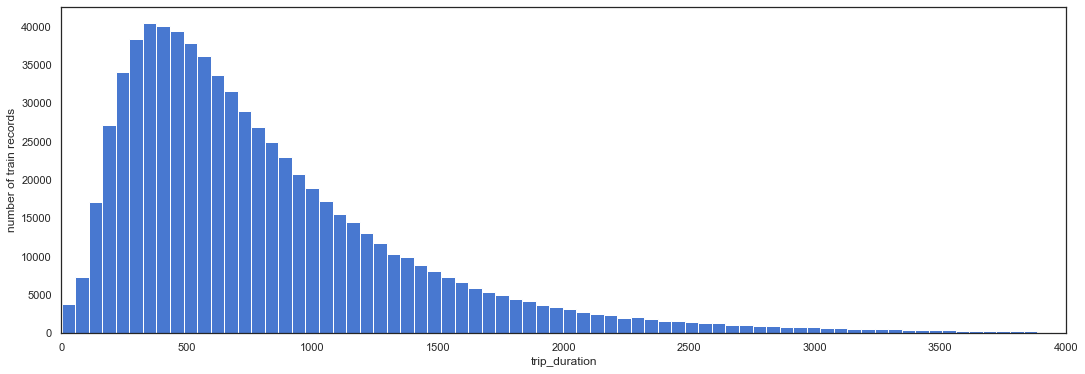

In [25]:
#Visualize the distribution of trip_duration values
plt.subplots(figsize=(18,6))
plt.xlim(0,4000)
plt.hist(df['trip_duration'].values, bins=100,color="b")
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

In [26]:
df['trip_duration'] = np.log(df['trip_duration'].values)

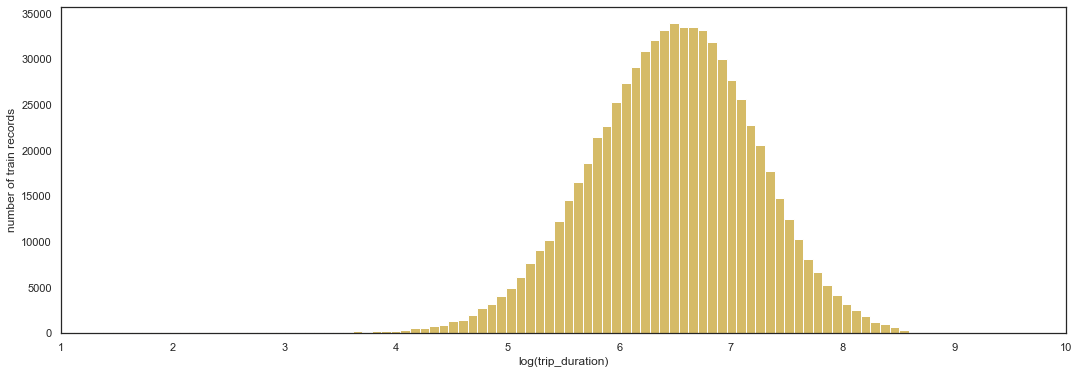

In [27]:
#Log-transformation
plt.subplots(figsize=(18,6))
plt.xlim(1,10)
plt.hist(df['trip_duration'].values, bins=100,color="y")
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

**Add Distance (miles)**

I am going to use the **‘haversine’** formula to calculate the great-circle distance between two points.The Haversine (or great circle) distance is the angular distance between two points on the surface of a sphere.

In [28]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956    # Use 6371 Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [29]:
x = lambda df: haversine(df.pickup_longitude,df.pickup_latitude,df.dropoff_longitude,df.dropoff_latitude) #lambda array function
df["distance"] = df.apply(x, axis=1)

**Remove distance outliers**

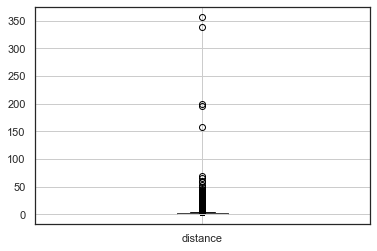

In [30]:
#Visualize distance outliers
df.boxplot(column='distance', return_type='axes');

In [31]:
round(df.distance.describe([0.998,0.99999,0.999995]))

count       727799.0
mean             2.0
std              3.0
min              0.0
50%              1.0
99.8%           14.0
99.999%         60.0
99.9995%       171.0
max            357.0
Name: distance, dtype: float64

In [32]:
df = df[(df.distance < 171)]
df.shape

(727795, 13)

**Add spead (miles/seconds) and drop outliers**

In [33]:
df['speed'] = df.distance / np.log(df.travel_time)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,travel_time,distance,speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,5.991465,400.0,0.744551,0.124269
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,7.003065,1100.0,2.563925,0.366115
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,7.399398,1635.0,4.502273,0.608465
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,7.039660,1141.0,1.466097,0.208262
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,6.742881,848.0,2.687754,0.398606


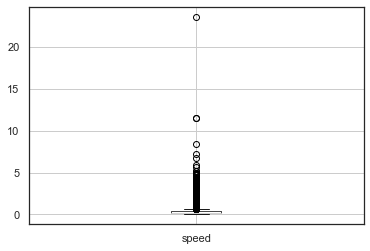

In [34]:
df.boxplot(column='speed', return_type='axes');

In [35]:
df = df[(df.speed < 10)]
df.drop(['speed'], axis=1, inplace=True)
df.shape

(727780, 13)

**Add direction** values 0 to 7
> ["north","north east","east","south east","south","south west","west","north west"]

In [36]:
import math
def calcBearing (lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = math.cos(math.radians(lat2)) * math.sin(math.radians(dLon))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dLon))
    bearing = math.atan2(x,y)   # use atan2 to determine the quadrant
    bearing = math.degrees(bearing)
    bearing += 22.5
    bearing = bearing % 360
    bearing = int(bearing / 45) # values 0 to 7 ["north", "north east", "east", "south east", "south", "south west", "west", "north west"]
    return bearing


In [37]:
t = lambda df: calcBearing(df.pickup_latitude,df.pickup_longitude,df.dropoff_latitude,df.dropoff_longitude,) #lambda array function
df["direction"] = df.apply(t, axis=1)

In [38]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,travel_time,distance,direction
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,5.991465,400.0,0.744551,5
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,7.003065,1100.0,2.563925,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,7.399398,1635.0,4.502273,1
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,7.039660,1141.0,1.466097,0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,6.742881,848.0,2.687754,1


**Add variables related to pickup time**

In [39]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)

df.loc[:, 'pick_month'] = df['pickup_datetime'].dt.month
df.loc[:, 'day_of_year'] = df['pickup_datetime'].dt.dayofyear
df.loc[:, 'day_of_week'] = df['pickup_datetime'].dt.dayofweek
df.loc[:, 'hour'] = df['pickup_datetime'].dt.hour


In [40]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,travel_time,distance,direction,pick_month,day_of_year,day_of_week,hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,5.991465,400.0,0.744551,5,2,60,0,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,7.003065,1100.0,2.563925,4,3,71,4,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,7.399398,1635.0,4.502273,1,2,52,6,17
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,7.039660,1141.0,1.466097,0,1,5,1,9
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,6.742881,848.0,2.687754,1,2,48,2,6


**Add weekday/weekend Boolean**

In [41]:
df["weekday_weekend"]=np.where(df['day_of_week']>4,0,1)

In [42]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,travel_time,distance,direction,pick_month,day_of_year,day_of_week,hour,weekday_weekend
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,5.991465,400.0,0.744551,5,2,60,0,16,1
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,7.003065,1100.0,2.563925,4,3,71,4,23,1


**Convert object into category**

In [43]:
df['vendor_id'] = df['vendor_id'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

#### Encoding

In [44]:
features = ["vendor_id",'store_and_fwd_flag']
features_num=["passenger_count","pick_month","day_of_year","day_of_week","weekday_weekend","hour","distance","direction","trip_duration"]

df_en = pd.get_dummies(df[features])

In [45]:
df_cleaned = pd.concat([df_en,df[features_num]],axis=1)

In [46]:
df_cleaned.head(3)

,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y,passenger_count,pick_month,day_of_year,day_of_week,weekday_weekend,hour,distance,direction,trip_duration
0,0,1,1,0,1,2,60,0,1,16,0.744551,5,5.991465
1,1,0,1,0,2,3,71,4,1,23,2.563925,4,7.003065
2,0,1,1,0,2,2,52,6,0,17,4.502273,1,7.399398


In [47]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727780 entries, 0 to 729321
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id_1           727780 non-null  uint8  
 1   vendor_id_2           727780 non-null  uint8  
 2   store_and_fwd_flag_N  727780 non-null  uint8  
 3   store_and_fwd_flag_Y  727780 non-null  uint8  
 4   passenger_count       727780 non-null  int64  
 5   pick_month            727780 non-null  int64  
 6   day_of_year           727780 non-null  int64  
 7   day_of_week           727780 non-null  int64  
 8   weekday_weekend       727780 non-null  int32  
 9   hour                  727780 non-null  int64  
 10  distance              727780 non-null  float64
 11  direction             727780 non-null  int64  
 12  trip_duration         727780 non-null  float64
dtypes: float64(2), int32(1), int64(6), uint8(4)
memory usage: 55.5 MB


**Now, Data is ready to perfom prediction**

#### Segregating variables: Independent and Dependent Variables

In [48]:
#seperating independent and dependent variables
x = df_cleaned.drop(['trip_duration'], axis =1)
y = df_cleaned['trip_duration']
x.shape,y.shape

((727780, 12), (727780,))

#### Scaling the data (Using MinMax Scaler)

In [49]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [50]:
x = pd.DataFrame(x_scaled)

In [51]:
x.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,1.0,0.0,0.000,0.2,0.325967,0.000000,1.0,0.695652,0.012287,0.714286
1,1.0,0.0,1.0,0.0,0.125,0.4,0.386740,0.666667,1.0,1.000000,0.042312,0.571429
2,0.0,1.0,1.0,0.0,0.125,0.2,0.281768,1.000000,0.0,0.739130,0.074301,0.142857


In [52]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 96)

#### 1. Build a K-Nearest neighbours model for the given dataset and find the best value of K.

In [53]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [54]:
# Creating instance of KNN
reg = KNN(n_neighbors = 3)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     0.36981382675225477


### Elbow for Classifier

In [57]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [58]:
#Defining K range
k = range(1,40)

In [59]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

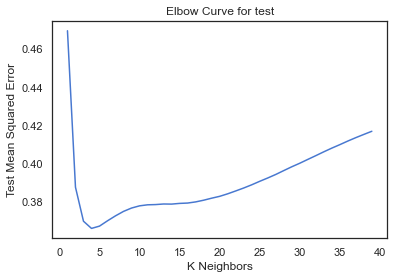

In [60]:
 # plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

So, the lowest error occurs when **k = 5**

In [64]:
# re-checking the error after changing n_neighbors to 5

reg = KNN(n_neighbors=5)
reg.fit(train_x, train_y)

KNeighborsRegressor()

**Test Score**

In [65]:
# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     0.367256441870579


**Train Score**

In [67]:
test_predict = reg.predict(train_x)

k = mse(test_predict,train_y)

print("Train MSE: ", k)

Train MSE:  0.23613625184349843


#### 2. Build a Linear model for the given dataset with regularisation.

In [68]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

#### LinearRegression Fit and finding the coefficient.

In [77]:
regression_model = LinearRegression()
regression_model.fit(train_x, train_y)
for idcoff, columnname in enumerate(train_x.columns):
    print("The coefficient for {} is {}".format(columnname, regression_model.coef_[idcoff]))

The coefficient for 0 is -0.002691714283804495
The coefficient for 1 is 0.0026917142838045
The coefficient for 2 is 0.020631767760954718
The coefficient for 3 is -0.020631767760951998
The coefficient for 4 is 0.053376326876899444
The coefficient for 5 is -0.01630235922779575
The coefficient for 6 is 0.1199023668051186
The coefficient for 7 is 0.0950798370942207
The coefficient for 8 is 0.1571895263496721
The coefficient for 9 is 0.13466362619659106
The coefficient for 10 is 12.349706442517505
The coefficient for 11 is -0.01720369427576961


In [79]:
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 5.712943397923728


In [80]:
print(regression_model.score(train_x, train_y))
print(regression_model.score(test_x, test_y))

0.4145053696898473
0.4150475728804184


#### Now, will apply regularization techniques and review the scores and impact of the techniques on the model.

In [84]:
# Create a Regularized RIDGE Model and coefficients.

ridge = Ridge(alpha=.3)
ridge.fit(train_x,train_y)
print ("Ridge model:", (ridge.coef_))

Ridge model: [-2.69323161e-03  2.69323161e-03  2.05929316e-02 -2.05929316e-02
  5.33846602e-02 -1.62866051e-02  1.19894073e-01  9.50779328e-02
  1.57183842e-01  1.34651370e-01  1.23454508e+01 -1.71521156e-02]


In [85]:
# Create a Regularized LASSO Model and coefficients

lasso = Lasso(alpha=0.1)
lasso.fit(train_x,train_y)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0.  0.]


In [86]:
print(ridge.score(train_x, train_y))
print(ridge.score(test_x, test_y))

0.4145053217867054
0.41504731639835424


In [89]:
print(lasso.score(train_x, train_y))
print(lasso.score(test_x, test_y))

0.0
-1.4330115694072276e-06


<table>
  <tr>
    <th>LR</th>
    <th>RIDGE (L2)</th>
    <th>LASSO (L1)</th>
  </tr>
  <tr>
    <td>41.4%</td>
    <td>41.4%</td>
    <td>0.0%</td>
  </tr>
  <tr>
    <td>41.5%</td>
    <td>41.5%</td>
    <td>0.0001%</td>
  </tr>
</table>

#### 3. Build a Random Forest model for the given dataset

In [90]:
# Import random Forest library
from sklearn.ensemble import RandomForestRegressor

In [92]:
Regressor_rf = RandomForestRegressor(random_state=96, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [93]:
Regressor_rf.fit(train_x, train_y)

RandomForestRegressor(max_depth=5, n_jobs=-1, oob_score=True, random_state=96)

In [94]:
# checking the oob score
Regressor_rf.oob_score_

0.6603403262489915

Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data

In [95]:
rf = RandomForestRegressor(random_state=96, n_jobs=-1)

In [96]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [101]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
# Instantiate the Random search model
random_search = RandomizedSearchCV(estimator=rf,
                           param_distributions=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [104]:
%time random_search.fit(train_x, train_y)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Wall time: 15min 57s


RandomizedSearchCV(cv=4,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=96),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50, 100,
                                                             200],
                                        'n_estimators': [10, 25, 30, 50, 100,
                                                         200]},
                   scoring='accuracy', verbose=1)

In [105]:
random_search.best_score_

nan

In [106]:
rf_best = random_search.best_estimator_
rf_best

RandomForestRegressor(max_depth=2, min_samples_leaf=100, n_estimators=10,
                      n_jobs=-1, random_state=96)

From hyperparameter tuning, we can fetch the best estimator as shown. The best set of parameters identified were max_depth=2, min_samples_leaf=100,n_estimators=10

In [108]:
Regressor_rf = RandomForestRegressor(random_state=96, n_jobs=-1, max_depth=2,min_samples_leaf=100,n_estimators=10, oob_score=True)

In [109]:
Regressor_rf.fit(train_x, train_y)

RandomForestRegressor(max_depth=2, min_samples_leaf=100, n_estimators=10,
                      n_jobs=-1, oob_score=True, random_state=96)

In [110]:
# checking the oob score
Regressor_rf.oob_score_

-0.1622508551067967

#### 4. Build a Gradient Boosting model for the given dataset.


In [111]:
#Importing GBDT Regressor 
from sklearn.ensemble import GradientBoostingRegressor

In [113]:
#creating an Gradient boosting instance
reg_gbm = GradientBoostingRegressor(random_state=96)

In [114]:
#training the model
reg_gbm.fit(train_x,train_y)

GradientBoostingRegressor(random_state=96)

In [115]:
#calculating score on test data
reg_gbm.score(test_x, test_y)

0.7062782201949505

#### Model Based Hyperparameters

In [127]:
#creating an Gradient boosting instance
reg_gbm = GradientBoostingRegressor(random_state=96, n_estimators= 10,max_depth= 2,)

In [128]:
reg_gbm.fit(train_x,train_y)

GradientBoostingRegressor(max_depth=2, n_estimators=10, random_state=96)

In [129]:
#calculating score on test data
reg_gbm.score(test_x, test_y)

0.5184883984971446

In [131]:
print("The mean squared error (MSE) on test set: " ,mse(test_y, reg_gbm.predict(test_x)))

The mean squared error (MSE) on test set:  0.28799085872743185


#### 5. Combine all the models above using the averaging technique to generate the final predictions.

#### Averaging

In [135]:
model1 = LinearRegression()
model1.fit(train_x,train_y)
pred1=model1.predict(test_x)
pred1[:10], model1.score(test_x, test_y)

(array([6.72009952, 6.29514906, 6.75383429, 6.15543024, 6.33281834,
        6.24558796, 6.63946957, 6.18145674, 6.09275583, 6.58783751]),
 0.4150475728804184)

In [136]:
model2 = KNN(n_neighbors=5)
model2.fit(train_x,train_y)
pred2=model2.predict(test_x)
pred2[:10], model2.score(test_x, test_y)

(array([7.04101314, 5.99333052, 6.99748092, 6.06387945, 6.21782808,
        5.98283784, 7.19664922, 6.39494168, 6.16615957, 6.96637769]),
 0.3859588520665135)

In [137]:
model3 = RandomForestRegressor(random_state=96, n_jobs=-1, max_depth=2,min_samples_leaf=100,n_estimators=10, oob_score=True)
model3.fit(train_x,train_y)
pred3=model3.predict(test_x)
pred3[:10], model2.score(test_x, test_y)

(array([7.34376281, 6.16991172, 7.34376281, 6.16991172, 6.70983192,
        6.16991172, 6.70983192, 5.51231161, 5.51231161, 6.70983192]),
 0.3859588520665135)

In [138]:
model4 = GradientBoostingRegressor(random_state=96, n_estimators= 10,max_depth= 2,)
model4.fit(train_x,train_y)
pred4=model4.predict(test_x)
pred4[:10], model4.score(test_x, test_y)

(array([6.87298041, 6.37902474, 6.91564523, 6.18833045, 6.55733582,
        6.37902474, 6.80944671, 5.80709744, 5.74794829, 6.75116928]),
 0.5184883984971446)

In [141]:
from statistics import mean
final_pred = np.array([])
for i in range(0,len(test_x)):
    final_pred = np.append(final_pred, mean([pred1[i], pred2[i], pred3[i],pred4[i]]))

In [142]:
from sklearn.metrics import r2_score

In [143]:
r2_score(test_y, final_pred)

0.5576413582553617

In [144]:
r2_score(test_y, pred1), r2_score(test_y, pred2), r2_score(test_y, pred3),r2_score(test_y, pred4)

(0.4150475728804184, 0.3859588520665135, 0.556538435733736, 0.5184883984971446)

#### Rank Averaging

In [145]:
m1_score= model1.score(test_x, test_y)
m2_score= model2.score(test_x, test_y)
m3_score= model3.score(test_x, test_y)
m4_score= model4.score(test_x, test_y)
m1_score, m2_score, m3_score, m4_score

(0.4150475728804184,
 0.3859588520665135,
 0.5565384357337358,
 0.5184883984971446)

In [146]:
index_ = [1,2,3,4]
valid_r2 = [m1_score,m2_score,m3_score,m4_score]

rank_eval = pd.DataFrame({
    'score':valid_r2
}, index = index_)
rank_eval

,score
1,0.415048
2,0.385959
3,0.556538
4,0.518488


In [147]:
sorted_rank = rank_eval.sort_values('score')
sorted_rank

,score
2,0.385959
1,0.415048
4,0.518488
3,0.556538


In [149]:
sorted_rank['rank'] = [i for i in range(1,5)]
sorted_rank

,score,rank
2,0.385959,1
1,0.415048,2
4,0.518488,3
3,0.556538,4


In [150]:
sorted_rank['weight'] = sorted_rank['rank']/sorted_rank['rank'].sum()
sorted_rank

,score,rank,weight
2,0.385959,1,0.1
1,0.415048,2,0.2
4,0.518488,3,0.3
3,0.556538,4,0.4


In [151]:
wt_pred1 = pred1*float(sorted_rank.loc[[1],['weight']].values)
wt_pred2 = pred2*float(sorted_rank.loc[[2],['weight']].values)
wt_pred3 = pred3*float(sorted_rank.loc[[3],['weight']].values)
wt_pred4 = pred4*float(sorted_rank.loc[[4],['weight']].values)
ranked_prediction = wt_pred1 + wt_pred2 + wt_pred3 + wt_pred4
ranked_prediction

array([7.04752046, 6.24003497, 7.06271364, ..., 6.2079719 , 5.76773565,
       7.44230089])

In [152]:
r2_score(test_y, ranked_prediction)

0.5715122185982517

**Conclusion:** R squared is 57.1%